<h1> RECIPE  </h1>


1) Build model: find likelyhood and priors
1)(a) make prior predictive checks

2)Calculate the posterior distribution

3) Create samples frpm the posterior distribution

4) Post predictive check 

PYMC does that for us.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [2]:
import pandas as pd

In [3]:
with pm.Model() as worldtossmodel: # The model
    # define priors
     p = pm.Uniform('p', lower=0, upper=1)#prior

    # define likelihood
     y = pm.Binomial('y', n=9, p=p, observed=6)#likelyhood  
    ##    
  # 1) Build model: find likelyhoohd and priors

#2)Calculate the posterior distribution*/


In [4]:
#3) Create samples frpm the posterior distribution
with worldtossmodel:
    trace = pm.sample(1000, tune=1000) #draw 1000 samples from the posterior



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:05<00:00, 673.67draws/s] 


/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

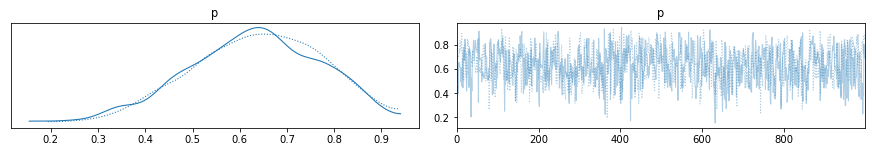

In [5]:
pm.traceplot(trace)

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

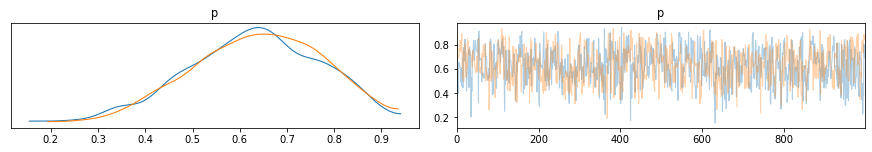

In [6]:
az.plot_trace(trace)

The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. 



<h2>What do we need to look at when we see these plots?</h2>

<p>Well, KDE plots should look like smooth curves. Often, as the number of data increases, the distribution of each parameter will tend to become Gaussian-like; this is due to the law of the large numbers. Of course, this is not always true.</p>
<p>The plot on the right should look like white noise; we are looking for good mixing. We should not see any recognizable pattern, we should not see a curve going up or down, instead we want a curve meandering around a single value.</p>
<p>For multimodal distributions or discrete distributions we expect the curve to not spend too much time in a value or region before moving to other regions, we want to see sampled values moving freely among these regions.</p>
<p>We should also expect to see a stable auto-similar trace, that is, a
trace that at different points looks more or less the same; for example, the first 10% (or so) should look similar to other portions in the trace like the last 50% or 10%. Once again, we do not want patterns; instead we expect something noisy.</p><p> See the following figure for some examples of traces with good mixing (on the right) and bad mixing (on the left):</p>

<img src="traces.png" />





In [7]:

az.summary(trace, round_to=2,kind="stats")




/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
p,0.63,0.14,0.38,0.88


/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

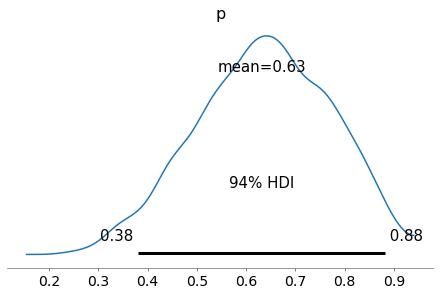

In [8]:
pm.plot_posterior(trace)

<h1> POSTERIOR PREDICTIVE Checks </h1> 




In [9]:
with worldtossmodel:
    ppc = pm.sample_posterior_predictive(
      trace
    )

100%|██████████| 2000/2000 [00:01<00:00, 1334.97it/s]


In [11]:
idata = az.from_pymc3(trace, posterior_predictive=ppc)
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

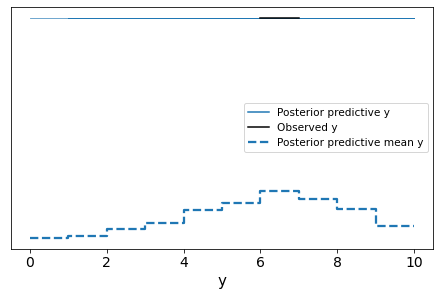

In [11]:
az.plot_ppc(idata);